In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler   , RobustScaler, StandardScaler
import seaborn as sns

In [2]:
df_census = pd.read_csv('Census-validBG.csv')
df_2019_missing = pd.read_csv('Census_corruptBG_v2.csv')
df_census.head()

,BLOCKGROUP_ID,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,...,Households considered in poverty calculation,Families with income below poverty,Individuals with income below poverty,Households with income below poverty,Total population 25 or older,No schooling completed,High school diploma,Bachelor's degree,Master's degree,Doctorate degree
0,290019505004,1127,15955,134900,93,1010,14,95,0,14,...,433,72,607,233,373,0,0,81,0,0
1,290019505003,1033,41652,155800,270,952,11,28,0,28,...,337,0,218,126,350,0,0,86,69,99
2,290019503004,811,13167,98500,121,738,41,31,0,74,...,352,0,443,213,407,11,21,45,45,31
3,290019503001,527,39208,71600,97,525,2,0,0,92,...,249,13,123,76,411,2,21,37,50,3
4,290019502002,857,48529,82400,127,763,0,0,84,157,...,340,39,148,60,594,3,18,61,61,0


In [3]:
population_mean = df_census['Total population'].mean()
population_mean

ignored_columns = ['BLOCKGROUP_ID',
                   'Families considered in poverty calculation', 
                   'Individuals considered in poverty calculation', 
                   'Households considered in poverty calculation', 
                   'Families with income below poverty', 
                   'Individuals with income below poverty', 'Number of Households', 'No schooling completed',
                   'High school diploma',	'Bachelor\'s degree',	'Master\'s degree','Doctorate degree', 'Total population 25 or older', 'Total civilian labor force', 'Total employed']
df_normalized = df_census.copy().drop(ignored_columns, axis = 1).astype(np.float32)
# df_normalized['Total population'] = df_normalized['Total population']/df_normalized['Total population'].mean()
# df_normalized['Median income'] = df_normalized['Median income']/df_normalized['Median income'].mean()
# df_normalized['Median home value'] = df_normalized['Median home value']/df_normalized['Median home value'].mean()
df_normalized.loc[:, "Total population age 25+ years with a bachelor's degree or higher" : 'Hispanic or Latino'] = df_normalized.loc[:, "Total population age 25+ years with a bachelor's degree or higher" : 'Hispanic or Latino'].div(df_census['Total population'], axis = 0)
df_normalized.loc[:, "Total Vacant" : 'Total Renter Occupied'] = df_normalized.loc[:, "Total Vacant" : 'Total Renter Occupied'].div(df_census['Number of Households'], axis = 0)
df_normalized.loc[:, 'Households with income below poverty'] = df_normalized.loc[:, 'Households with income below poverty'] .div(df_census['Households considered in poverty calculation'], axis = 0)
df_normalized.loc[:, 'Total unemployed']= df_normalized.loc[:, 'Total unemployed'].div(df_census['Total civilian labor force'], axis = 0)
df_normalized

,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Total unemployed,Households with income below poverty
0,1127.0,15955.0,134900.0,0.082520,0.896185,0.012422,0.084295,0.000000,0.032333,0.674365,0.070822,0.538106
1,1033.0,41652.0,155800.0,0.261375,0.921588,0.010649,0.027106,0.000000,0.083086,0.406528,0.106061,0.373887
2,811.0,13167.0,98500.0,0.149199,0.909988,0.050555,0.038224,0.000000,0.210227,0.849432,0.036082,0.605114
3,527.0,39208.0,71600.0,0.184061,0.996205,0.003795,0.000000,0.000000,0.369478,0.188755,0.009009,0.305221
4,857.0,48529.0,82400.0,0.148191,0.890315,0.000000,0.000000,0.098016,0.461765,0.150000,0.055422,0.176471
...,...,...,...,...,...,...,...,...,...,...,...,...
4180,540.0,39934.0,93600.0,0.120370,0.664815,0.000000,0.000000,0.335185,0.159091,0.200000,0.058559,0.145455
4181,813.0,34276.0,95400.0,0.115621,0.739237,0.092251,0.097171,0.071341,0.144796,0.260181,0.027523,0.149321
4182,1716.0,28125.0,98300.0,0.083333,0.385198,0.430070,0.004079,0.174825,0.205993,0.677903,0.136253,0.451311
4183,494.0,55489.0,258800.0,0.451417,0.846154,0.087045,0.000000,0.030364,0.111913,0.592058,0.041543,0.140794


In [118]:
scaler_X = MinMaxScaler()

norm_scaled_array = scaler_X.fit_transform(df_normalized)
df_norm_scaled = pd.DataFrame(data = norm_scaled_array, columns = df_normalized.columns)
df_norm_scaled['Normalization Status'] = ['Normalized']*len(df_norm_scaled)
display(df_norm_scaled.head())

scaled_array = scaler_X.fit_transform(df_census.drop(ignored_columns, axis = 1))
df_scaled = pd.DataFrame(data = scaled_array, columns = df_normalized.columns)
df_scaled['Normalization Status'] = ['Unnormalized']*len(df_scaled)

df_scaled.head()

combined_df = pd.concat([df_norm_scaled, df_scaled], axis = 0)
print(len(combined_df))

,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Total unemployed,Households with income below poverty,Normalization Status
0,0.085257,0.035610,0.076598,0.104709,0.896185,0.012422,0.162908,0.000000,0.006284,0.699748,0.145892,0.714570,Normalized
1,0.077453,0.141494,0.089415,0.331655,0.921588,0.010649,0.052384,0.000000,0.016148,0.421830,0.218485,0.496498,Normalized
2,0.059024,0.024122,0.054275,0.189316,0.909988,0.050555,0.073873,0.000000,0.040857,0.881404,0.074330,0.803552,Normalized
3,0.035447,0.131424,0.037778,0.233553,0.996205,0.003795,0.000000,0.000000,0.071808,0.195860,0.018559,0.405314,Normalized
4,0.062842,0.169831,0.044401,0.188038,0.890315,0.000000,0.000000,0.103579,0.089743,0.155646,0.114169,0.234342,Normalized


8370


In [105]:
len(norm_scaled_array), len(scaled_array)

(4185, 4185)

In [99]:
combined_df

,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Total unemployed,Households with income below poverty,Normalization Status
0,-0.316132,-1.465036,-0.187118,-0.765041,0.418341,-0.464950,1.856944,-0.560649,-0.537418,1.661123,0.394533,3.543920,Normalized
1,-0.427577,-0.590458,0.016862,0.504757,0.518241,-0.472400,0.293506,-0.560649,-0.360259,0.420568,1.044213,2.091502,Normalized
2,-0.690775,-1.559924,-0.542374,-0.291649,0.472623,-0.304803,0.597475,-0.560649,0.083536,2.471991,-0.245928,4.136560,Normalized
3,-1.027479,-0.673638,-0.804913,-0.044141,0.811681,-0.501183,-0.447506,-0.560649,0.639412,-0.588105,-0.745063,1.484189,Normalized
4,-0.636238,-0.356405,-0.699507,-0.298800,0.395258,-0.517121,-0.447506,0.761276,0.961546,-0.767608,0.110617,0.345471,Normalized
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4180,-1.012066,-0.648929,-0.590197,-0.729595,-0.962189,-0.509513,-0.395142,1.301007,-0.362899,-0.753070,-0.533258,-0.574411,Unnormalized
4181,-0.688404,-0.841495,-0.572630,-0.631995,-0.657170,-0.249390,0.784451,0.019890,-0.144791,-0.346342,-0.562488,-0.053729,Unnormalized
4182,0.382173,-1.050839,-0.544326,-0.467085,-0.581546,2.050099,-0.290621,2.540461,0.201174,1.068613,2.360552,2.626248,Unnormalized
4183,-1.066603,-0.119527,1.022120,-0.197844,-0.887825,-0.360376,-0.395142,-0.427980,-0.392983,-0.065642,-0.504027,-0.467212,Unnormalized


In [ ]:
df_norm_scaled[(df_norm_scaled == 1).any(1)]

In [ ]:
column = 'White alone'
sns.displot(df_norm_scaled, x=column, kind="kde")
sns.displot(df_scaled, x=column, kind="kde")
sns.displot(combined_df, x=column, kind="kde")



9


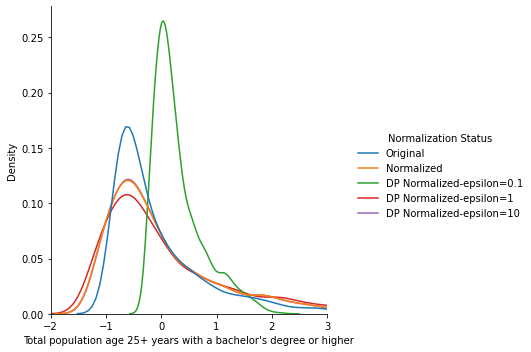

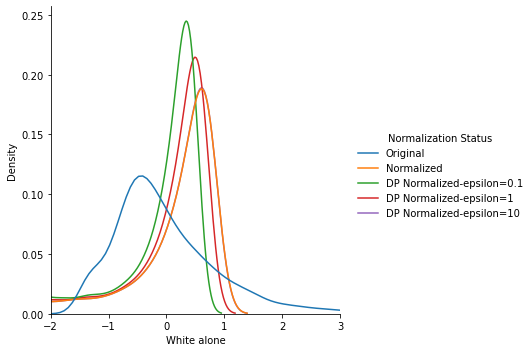

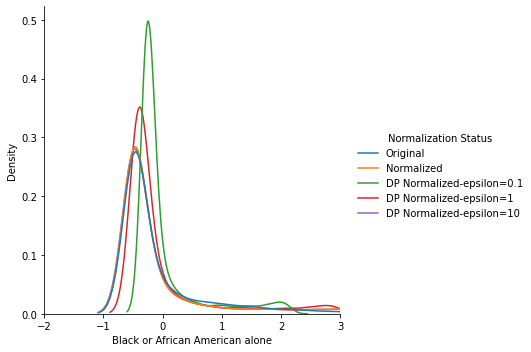

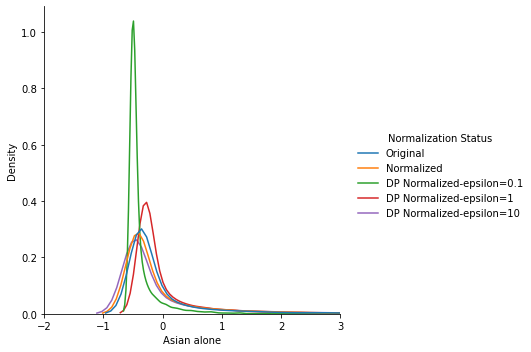

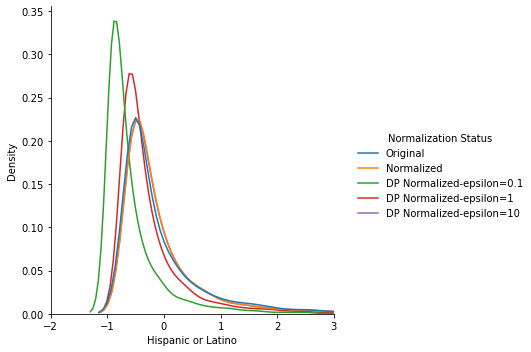

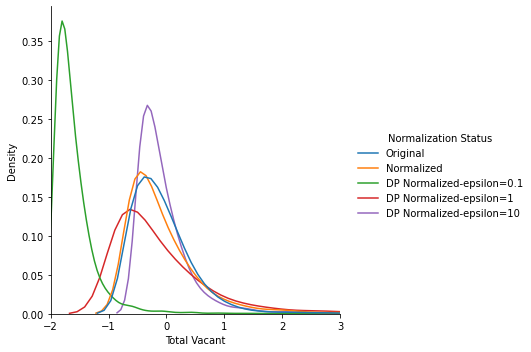

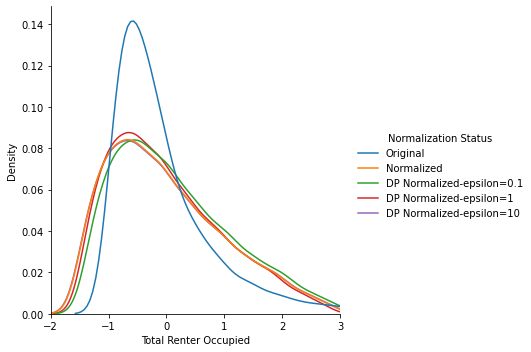

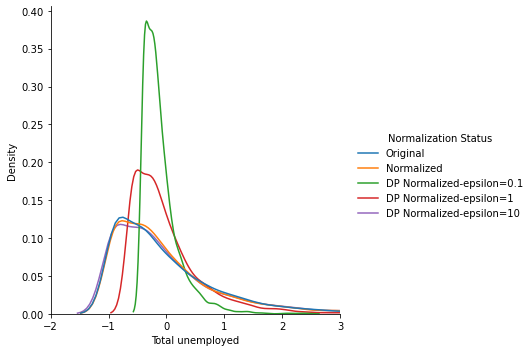

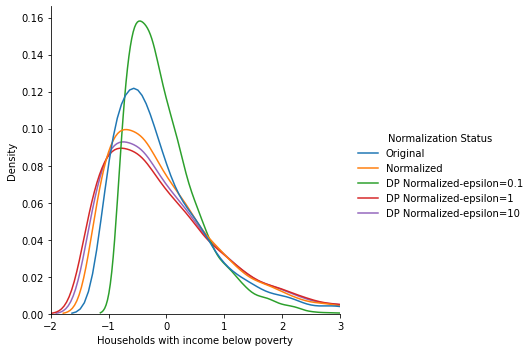

In [160]:
normalized_columns = ["Total population age 25+ years with a bachelor's degree or higher",
       'White alone', 'Black or African American alone', 'Asian alone',
       'Hispanic or Latino', 'Total Vacant', 'Total Renter Occupied',
       'Total unemployed', 'Households with income below poverty',]
print(len(normalized_columns))
for index, col in enumerate(normalized_columns):
    g= sns.displot(combined_df, x=col, hue="Normalization Status", kind="kde", height=5)
    g.set(xlim=(-2,3))
    g.savefig("{}.png".format(col))


In [ ]:
df_norm_scaled.columns

In [ ]:
import matplotlib.pyplot as plt

# data
stat_list = [[0.3,0.5,0.7,0.3,0.5], [0.2,0.1,0.9,0.7,0.4], [0.9,0.8,0.7,0.6,0.5], [0.2,0.6,0.75,0.87,0.91], [0.2,0.3,0.8,0.9,0.3], [0.2,0.3,0.8,0.87,0.92]]

# load the data into pandas and then transpose it for the correct column data
df = pd.DataFrame(stat_list).T

# name the columns; specify a layer number
df.columns = ['A', 'B', 'C', 'D', 'E', 'F']

# now stack the data into a long (tidy) format
dfl = df.stack().reset_index(level=1).rename(columns={'level_1': 'Layer', 0: 'Median Stn. MC-Loss'})

# plot a displot
g = sns.displot(data=dfl, x='Median Stn. MC-Loss', col='Layer', col_wrap=3, kde=True, color='green')
g.set_axis_labels(y_var='Density')
g.set(xlim=(0, 1.0), ylim=(0, 3.0))

In [119]:
temp = pd.melt(combined_df.loc[:, normalized_columns + ['Normalization Status']],id_vars=['Normalization Status']) 
temp

,Normalization Status,variable,value
0,Normalized,Total population age 25+ years with a bachelor...,0.104709
1,Normalized,Total population age 25+ years with a bachelor...,0.331655
2,Normalized,Total population age 25+ years with a bachelor...,0.189316
3,Normalized,Total population age 25+ years with a bachelor...,0.233553
4,Normalized,Total population age 25+ years with a bachelor...,0.188038
...,...,...,...
75325,Unnormalized,Households with income below poverty,0.037647
75326,Unnormalized,Households with income below poverty,0.077647
75327,Unnormalized,Households with income below poverty,0.283529
75328,Unnormalized,Households with income below poverty,0.045882


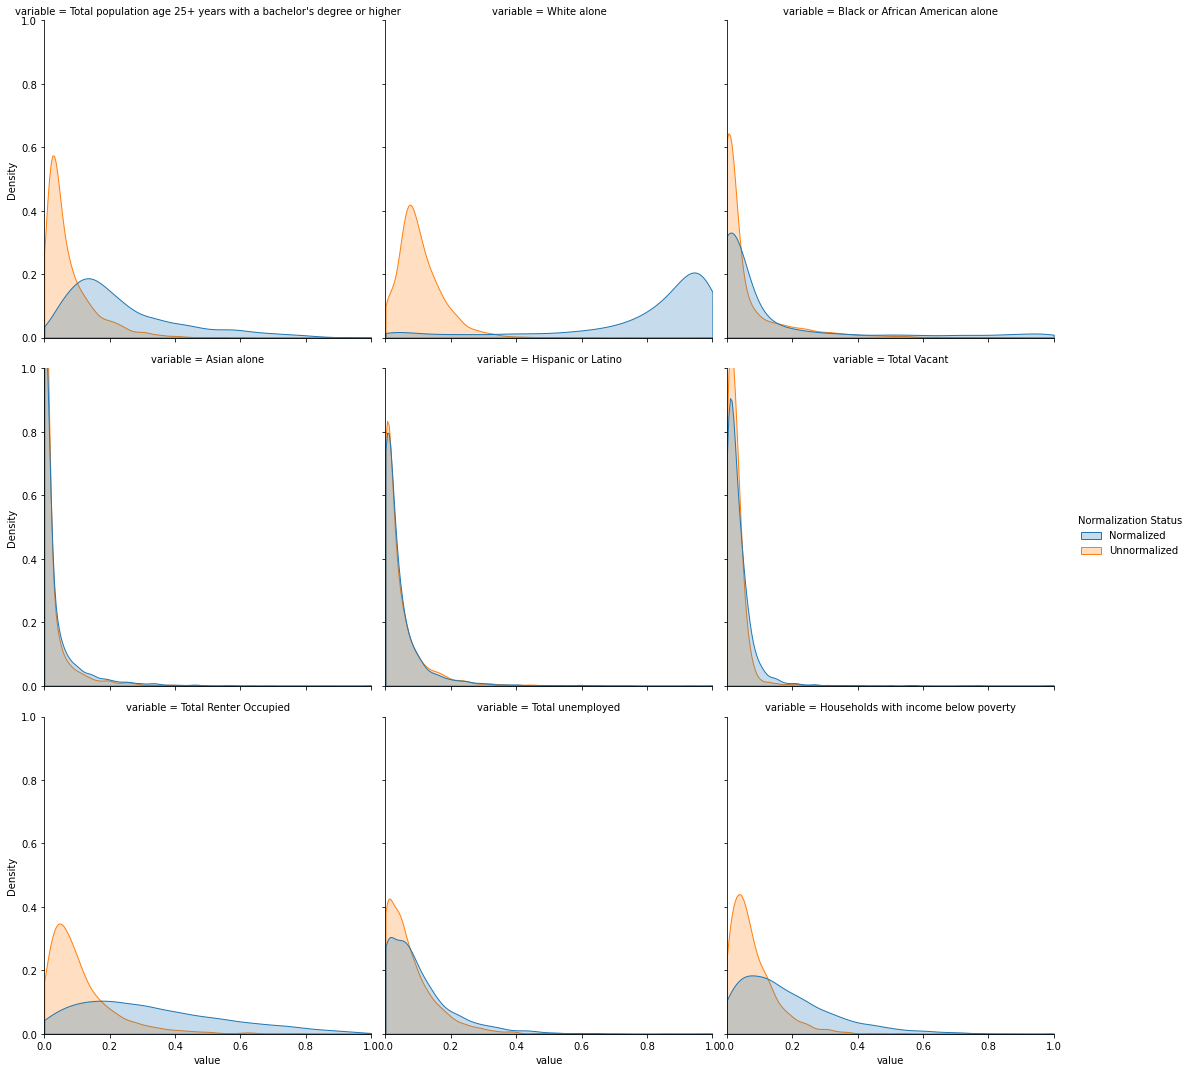

In [122]:
g = sns.displot(data=temp, x='value', col='variable', col_wrap=3, hue = 'Normalization Status', kind='kde', color='green', cut = 0, fill = True)
g.set_axis_labels(y_var='Density')
g.set(xlim=(0,1), ylim = (0,1))

g.savefig("census_distribution.png")

In [ ]:
dfl[dfl['Layer'] != 'Normalization Status']

In [ ]:
dfl

<h1> Differential Privacy

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler   , RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from diffprivlib.models import StandardScaler as DPStandardScaler


In [83]:
# df_normalized['Median home value (range)'] = pd.qcut(df_normalized['Median home value'],q=4,labels=[x for x in range(1, 5)])
X = df_normalized.drop(['Median home value'], axis = 1).reset_index(drop=True)
y = df_normalized.loc[:, ['Median home value']]
Z = df_2019_missing.drop(ignored_columns + ['Median home value', 'BLOCKGROUP_ID'], axis = 1).astype(np.float32)
Z = Z[(Z >= 0).all(1)]
display(Z)

,Total population,Median income,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Total unemployed,Households with income below poverty
0,887.0,21731.0,11.0,597.0,0.0,165.0,29.0,92.0,314.0,49.0,191.0
1,2337.0,13885.0,408.0,1744.0,92.0,251.0,66.0,91.0,1104.0,109.0,777.0
2,1736.0,13810.0,0.0,1430.0,91.0,27.0,76.0,30.0,278.0,37.0,269.0
3,780.0,17500.0,59.0,537.0,169.0,0.0,6.0,35.0,442.0,13.0,202.0
4,187.0,28250.0,5.0,187.0,0.0,0.0,0.0,50.0,19.0,12.0,8.0
5,893.0,39926.0,303.0,631.0,168.0,0.0,62.0,168.0,621.0,0.0,189.0
6,625.0,29358.0,36.0,392.0,54.0,54.0,0.0,0.0,181.0,71.0,68.0
7,270.0,30556.0,10.0,120.0,150.0,0.0,0.0,54.0,102.0,48.0,86.0
8,3271.0,16069.0,55.0,2763.0,209.0,136.0,119.0,122.0,579.0,189.0,358.0
9,750.0,16050.0,84.0,525.0,31.0,134.0,7.0,44.0,258.0,0.0,134.0


In [154]:
scaler_X = StandardScaler()

scaled_array = scaler_X.fit_transform(df_census.drop(ignored_columns, axis = 1))
df_scaled = pd.DataFrame(data = scaled_array, columns = df_normalized.columns)
df_scaled['Normalization Status'] = ['Original']*len(df_scaled)

norm_scaled_array = scaler_X.fit_transform(df_normalized)
df_norm_scaled = pd.DataFrame(data = norm_scaled_array, columns = df_normalized.columns)
df_norm_scaled['Normalization Status'] = ['Normalized']*len(df_norm_scaled)
display(df_norm_scaled.head())

combined_df = pd.concat([df_scaled, df_norm_scaled], axis = 0)

for epsilon in [0.1, 1, 10]:
    scaler_X = DPStandardScaler(epsilon=epsilon)

    norm_scaled_dp_array = scaler_X.fit_transform(df_normalized)
    df_norm_scaled_dp = pd.DataFrame(data = norm_scaled_dp_array, columns = df_normalized.columns)
    df_norm_scaled_dp['Normalization Status'] = ['DP Normalized-epsilon={}'.format(epsilon)]*len(df_norm_scaled_dp)
    display(df_norm_scaled.head())
    combined_df = pd.concat([combined_df, df_norm_scaled_dp], axis = 0)

print(len(combined_df))

,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Total unemployed,Households with income below poverty,Normalization Status
0,-0.316132,-1.465036,-0.187118,-0.765041,0.418341,-0.464950,1.856944,-0.560649,-0.537418,1.661123,0.394533,3.543920,Normalized
1,-0.427577,-0.590458,0.016862,0.504757,0.518241,-0.472400,0.293506,-0.560649,-0.360259,0.420568,1.044213,2.091502,Normalized
2,-0.690775,-1.559924,-0.542374,-0.291649,0.472623,-0.304803,0.597475,-0.560649,0.083536,2.471991,-0.245928,4.136560,Normalized
3,-1.027479,-0.673638,-0.804913,-0.044141,0.811681,-0.501183,-0.447506,-0.560649,0.639412,-0.588105,-0.745063,1.484189,Normalized
4,-0.636238,-0.356405,-0.699507,-0.298800,0.395258,-0.517121,-0.447506,0.761276,0.961546,-0.767608,0.110617,0.345471,Normalized


C:\Users\dhh3hb\Anaconda3\lib\site-packages\diffprivlib\models\standard_scaler.py:214: PrivacyLeakWarning: Range parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage.  To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn("Range parameter hasn't been specified, so falling back to determining range from the data.\n"


,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Total unemployed,Households with income below poverty,Normalization Status
0,-0.316132,-1.465036,-0.187118,-0.765041,0.418341,-0.464950,1.856944,-0.560649,-0.537418,1.661123,0.394533,3.543920,Normalized
1,-0.427577,-0.590458,0.016862,0.504757,0.518241,-0.472400,0.293506,-0.560649,-0.360259,0.420568,1.044213,2.091502,Normalized
2,-0.690775,-1.559924,-0.542374,-0.291649,0.472623,-0.304803,0.597475,-0.560649,0.083536,2.471991,-0.245928,4.136560,Normalized
3,-1.027479,-0.673638,-0.804913,-0.044141,0.811681,-0.501183,-0.447506,-0.560649,0.639412,-0.588105,-0.745063,1.484189,Normalized
4,-0.636238,-0.356405,-0.699507,-0.298800,0.395258,-0.517121,-0.447506,0.761276,0.961546,-0.767608,0.110617,0.345471,Normalized


C:\Users\dhh3hb\Anaconda3\lib\site-packages\diffprivlib\models\standard_scaler.py:214: PrivacyLeakWarning: Range parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage.  To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn("Range parameter hasn't been specified, so falling back to determining range from the data.\n"


,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Total unemployed,Households with income below poverty,Normalization Status
0,-0.316132,-1.465036,-0.187118,-0.765041,0.418341,-0.464950,1.856944,-0.560649,-0.537418,1.661123,0.394533,3.543920,Normalized
1,-0.427577,-0.590458,0.016862,0.504757,0.518241,-0.472400,0.293506,-0.560649,-0.360259,0.420568,1.044213,2.091502,Normalized
2,-0.690775,-1.559924,-0.542374,-0.291649,0.472623,-0.304803,0.597475,-0.560649,0.083536,2.471991,-0.245928,4.136560,Normalized
3,-1.027479,-0.673638,-0.804913,-0.044141,0.811681,-0.501183,-0.447506,-0.560649,0.639412,-0.588105,-0.745063,1.484189,Normalized
4,-0.636238,-0.356405,-0.699507,-0.298800,0.395258,-0.517121,-0.447506,0.761276,0.961546,-0.767608,0.110617,0.345471,Normalized


C:\Users\dhh3hb\Anaconda3\lib\site-packages\diffprivlib\models\standard_scaler.py:214: PrivacyLeakWarning: Range parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage.  To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn("Range parameter hasn't been specified, so falling back to determining range from the data.\n"


,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Total unemployed,Households with income below poverty,Normalization Status
0,-0.316132,-1.465036,-0.187118,-0.765041,0.418341,-0.464950,1.856944,-0.560649,-0.537418,1.661123,0.394533,3.543920,Normalized
1,-0.427577,-0.590458,0.016862,0.504757,0.518241,-0.472400,0.293506,-0.560649,-0.360259,0.420568,1.044213,2.091502,Normalized
2,-0.690775,-1.559924,-0.542374,-0.291649,0.472623,-0.304803,0.597475,-0.560649,0.083536,2.471991,-0.245928,4.136560,Normalized
3,-1.027479,-0.673638,-0.804913,-0.044141,0.811681,-0.501183,-0.447506,-0.560649,0.639412,-0.588105,-0.745063,1.484189,Normalized
4,-0.636238,-0.356405,-0.699507,-0.298800,0.395258,-0.517121,-0.447506,0.761276,0.961546,-0.767608,0.110617,0.345471,Normalized


20925


In [163]:
df_norm_scaled_dp

,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Total unemployed,Households with income below poverty,Normalization Status
0,-0.336061,-1.488034,-0.202227,-0.760799,0.418602,-0.470013,2.020746,-0.564615,-0.390359,1.671287,0.412030,3.803287,DP Normalized-epsilon=10
1,-0.452919,-0.599422,0.011353,0.498438,0.518056,-0.477543,0.315556,-0.564615,-0.269658,0.424034,1.087946,2.246579,DP Normalized-epsilon=10
2,-0.728903,-1.584444,-0.574206,-0.291344,0.472642,-0.308129,0.647085,-0.564615,0.032706,2.486532,-0.254295,4.438481,DP Normalized-epsilon=10
3,-1.081963,-0.683936,-0.849102,-0.045895,0.810188,-0.506639,-0.492641,-0.564615,0.411433,-0.590084,-0.773588,1.595659,DP Normalized-epsilon=10
4,-0.671717,-0.361612,-0.738734,-0.298435,0.395623,-0.522750,-0.492641,0.769442,0.630908,-0.770557,0.116648,0.375176,DP Normalized-epsilon=10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4180,-1.065802,-0.658831,-0.624280,-0.494311,-0.487224,-0.522750,-0.492641,3.997442,-0.088905,-0.537719,0.176816,0.081160,DP Normalized-epsilon=10
4181,-0.726416,-0.854487,-0.605885,-0.527748,-0.195856,-0.131117,2.404677,0.406372,-0.122900,-0.257470,-0.418475,0.117815,DP Normalized-epsilon=10
4182,0.396166,-1.067191,-0.576249,-0.755072,-1.581940,1.303026,-0.371011,1.814853,0.022635,1.687761,1.667063,2.980513,DP Normalized-epsilon=10
4183,-1.122987,-0.120933,1.063929,1.836442,0.222729,-0.153220,-0.492641,-0.151339,-0.201102,1.288002,-0.149557,0.036983,DP Normalized-epsilon=10


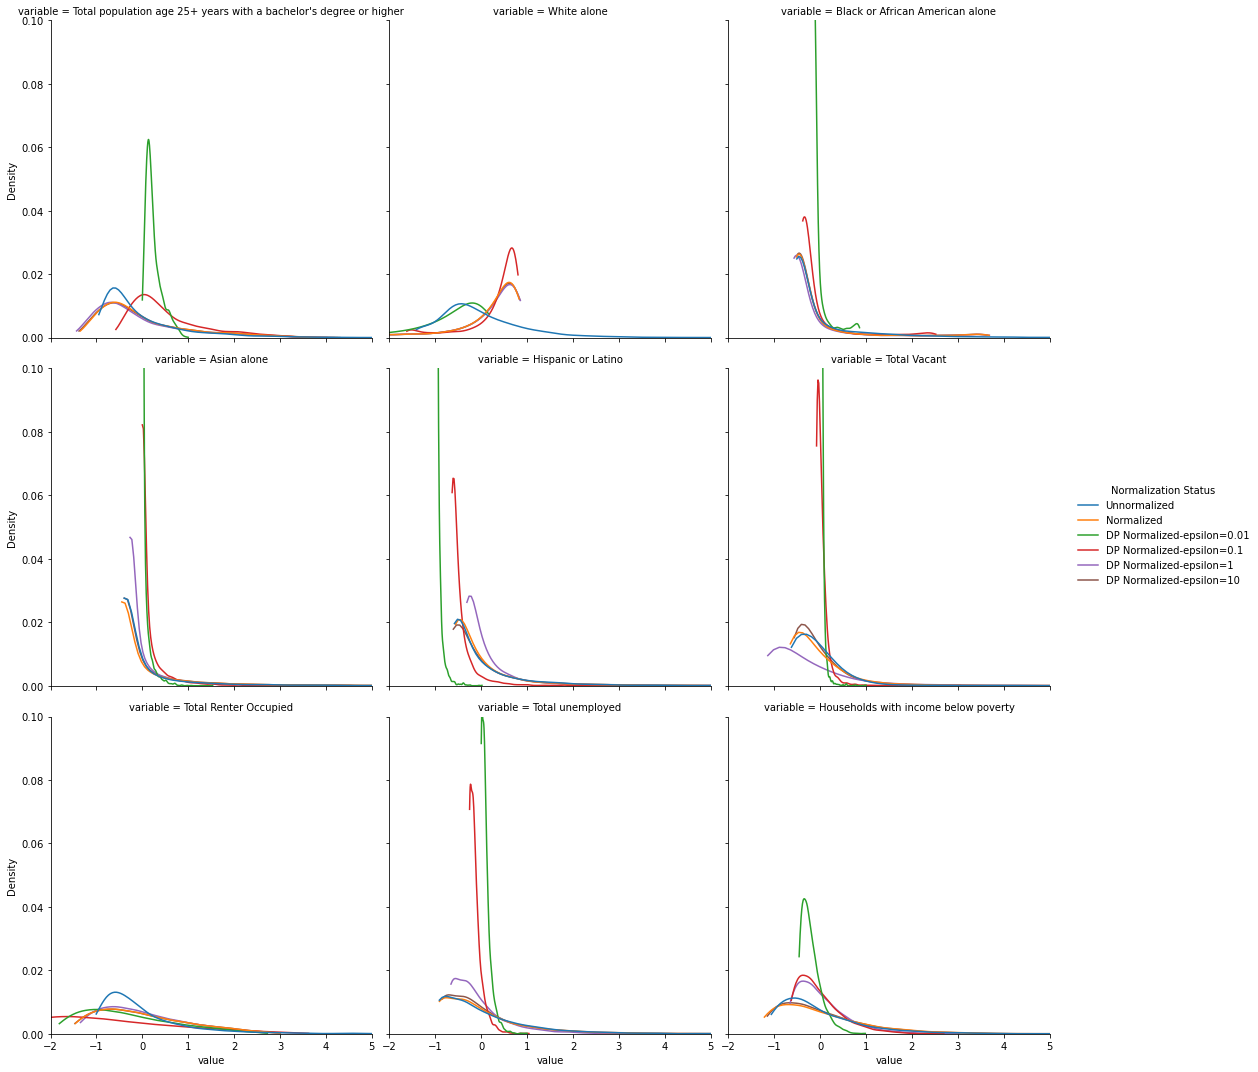

In [143]:
temp = pd.melt(combined_df.loc[:, normalized_columns + ['Normalization Status']],id_vars=['Normalization Status']) 
g = sns.displot(data=temp, x='value', col='variable', col_wrap=3, hue = 'Normalization Status', kind='kde', color='green', cut = 0, fill = False)
g.set_axis_labels(y_var='Density')
g.set(xlim=(-2,5), ylim = (0,0.1))

g.savefig("census_distribution_dp.png")

C:\Users\dhh3hb\Anaconda3\lib\site-packages\diffprivlib\models\standard_scaler.py:214: PrivacyLeakWarning: Range parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage.  To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn("Range parameter hasn't been specified, so falling back to determining range from the data.\n"


,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Total unemployed,Households with income below poverty
0,1127.0,15955.0,134900.0,0.082520,0.896185,0.012422,0.084295,0.000000,0.032333,0.674365,0.070822,0.538106
1,1033.0,41652.0,155800.0,0.261375,0.921588,0.010649,0.027106,0.000000,0.083086,0.406528,0.106061,0.373887
2,811.0,13167.0,98500.0,0.149199,0.909988,0.050555,0.038224,0.000000,0.210227,0.849432,0.036082,0.605114
3,527.0,39208.0,71600.0,0.184061,0.996205,0.003795,0.000000,0.000000,0.369478,0.188755,0.009009,0.305221
4,857.0,48529.0,82400.0,0.148191,0.890315,0.000000,0.000000,0.098016,0.461765,0.150000,0.055422,0.176471


,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Total unemployed,Households with income below poverty
0,1143.549515,14793.130927,136552.836753,0.079604,0.897572,0.010108,0.081402,-0.002296,0.085636,0.671412,0.069627,0.533441
1,1049.953732,41274.543715,154222.063312,0.262497,0.922830,0.008312,0.027094,-0.002296,0.117446,0.406423,0.103077,0.371248
2,828.908373,11920.025940,105779.638344,0.147788,0.911296,0.048721,0.037653,-0.002296,0.197132,0.844617,0.036652,0.599622
3,546.129625,38755.939486,83037.906553,0.183437,0.997023,0.001372,0.001354,-0.002296,0.296943,0.190965,0.010954,0.303429
4,874.710564,48361.467314,92168.415971,0.146758,0.891735,-0.002471,0.001354,0.101788,0.354784,0.152622,0.055009,0.176267


In [88]:
# Train - Test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
# Split train" into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=21)

In [89]:
X_train

,Total population,Median income,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Total unemployed,Households with income below poverty
3751,2204.0,43380.0,0.116606,0.850726,0.000907,0.026770,0.121597,0.347249,0.486717,0.031447,0.076850
3700,924.0,25368.0,0.041126,0.989177,0.010823,0.000000,0.000000,0.316708,0.473815,0.074713,0.326683
2374,1126.0,60238.0,0.116341,0.882771,0.000000,0.000000,0.091474,0.000000,0.281513,0.114437,0.027311
1191,1177.0,30199.0,0.201359,0.812235,0.002549,0.000000,0.177570,0.029358,0.398165,0.199501,0.168807
3590,2193.0,88403.0,0.330597,0.842681,0.003192,0.048336,0.095759,0.030337,0.291011,0.035038,0.041573
...,...,...,...,...,...,...,...,...,...,...,...
868,1097.0,44205.0,0.134913,0.930720,0.009116,0.000000,0.055606,0.079327,0.146635,0.080087,0.151442
2386,1337.0,27692.0,0.140613,0.892296,0.023934,0.000000,0.035901,0.239812,0.749216,0.020804,0.452978
1757,1258.0,62946.0,0.166932,0.976153,0.000000,0.000000,0.000000,0.011990,0.215827,0.122059,0.057554
166,2879.0,34000.0,0.211879,0.638069,0.078499,0.049670,0.158388,0.214829,0.472433,0.047192,0.236692


In [ ]:
scaler_X = StandardScaler(epsilon=0.3)
X_train = scaler_X.fit_transform(X_train)
X_val = scaler_X.transform(X_val)
X_test = scaler_X.transform(X_test)
Z_test = scaler_X.transform(Z)
scaler_y = MinMaxScaler()
# scaler_y = RobustScaler()
# y_train = scaler_y.fit_transform(y_train)
# y_val = scaler_y.transform(y_val)
# y_test = scaler_y.transform(y_test)

# X_train, y_train = np.array(X_train), np.array(y_train)
# X_val, y_val = np.array(X_val), np.array(y_val)
# X_test, y_test = np.array(X_test), np.array(y_test)

In [93]:
X_train

array([[ 0.15721381, -0.53528106, -0.40042521, ...,  0.50121159,
        -0.16341355, -0.31904033],
       [-0.24678719, -0.85096421, -0.85109229, ...,  0.45887294,
         0.18518921,  0.68854291],
       [-0.18303078, -0.23982322, -0.40200824, ..., -0.17219052,
         0.50525242, -0.51883299],
       ...,
       [-0.14136818, -0.19236209, -0.0999503 , ..., -0.38774418,
         0.56666589, -0.39686211],
       [ 0.37026122, -0.69967746,  0.16841454, ...,  0.45433768,
        -0.03654671,  0.32560595],
       [ 0.13827627, -0.74470244, -0.32246061, ...,  1.36611016,
        -0.29186647,  1.20704994]])

 have not been specified and will be calculated on the data provided. This will "
C:\Users\dhh3hb\Anaconda3\lib\site-packages\diffprivlib\models\naive_bayes.py:100: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
C:\Users\dhh3hb\Anaconda3\lib\site-packages\diffprivlib\models\naive_bayes.py:100: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
C:\Users\dhh3hb\Anaconda3\lib\site-packages\diffpriv

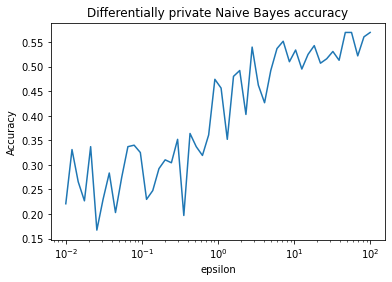

In [67]:
import numpy as np
import matplotlib.pyplot as plt

epsilons = np.logspace(-2, 2, 50)
# bounds = ([4.3, 2.0, 1.1, 0.1], [7.9, 4.4, 6.9, 2.5])
accuracy = list()

for epsilon in epsilons:
    clf = GaussianNB(epsilon=epsilon)
    clf.fit(X_train, y_train)
    
    accuracy.append(clf.score(X_val, y_val))

plt.semilogx(epsilons, accuracy)
plt.title("Differentially private Naive Bayes accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.show()

In [76]:
clf = GaussianNB(epsilon = 11)
clf.fit(X_train, y_train)

C:\Users\dhh3hb\Anaconda3\lib\site-packages\diffprivlib\models\naive_bayes.py:100: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


GaussianNB(accountant=BudgetAccountant(spent_budget=[(1.0, 0), (0.01, 0), (0.012067926406393288, 0), (0.014563484775012436, 0), (0.017575106248547922, 0), ...]),
           bounds=(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
                   array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])),
           epsilon=11)

In [77]:
# clf.predict(X_test)
clf.score(X_test, y_test)

0.4934289127837515

In [162]:
missing_df = pd.read_csv('Census-corruptBG.csv')


,BLOCKGROUP_ID,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,...,Households considered in poverty calculation,Families with income below poverty,Individuals with income below poverty,Households with income below poverty,Total population 25 or older,No schooling completed,High school diploma,Bachelor's degree,Master's degree,Doctorate degree
0,290019510001,664,-666666666,-666666666,0,527,50,24,25,0,...,0,0,0,0,5,0,0,0,0,0
1,290019505006,887,21731,-666666666,11,597,0,165,29,92,...,374,13,601,191,161,0,0,11,0,0
2,290019510003,886,-666666666,-666666666,0,742,32,36,7,0,...,4,0,11,4,14,0,0,0,0,0
3,290019510002,614,-666666666,-666666666,0,539,23,16,8,0,...,13,0,13,13,2,0,0,0,0,0
4,290019509003,641,-666666666,-666666666,20,546,7,0,40,0,...,230,9,530,189,69,0,0,20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,295101157003,916,47578,-666666666,153,359,391,44,122,21,...,371,5,100,60,673,34,14,107,36,0
317,295101164002,833,-666666666,96800,53,171,377,0,172,73,...,314,99,352,133,401,40,0,53,0,0
318,295101193001,1050,29620,-666666666,186,215,742,36,57,144,...,519,19,238,159,759,8,3,121,50,0
319,295101193003,1890,26250,-666666666,468,1068,251,340,167,112,...,663,3,416,243,697,0,14,206,157,52


<h1> Inverse Transform DP Data

In [269]:
import ast
df_census = pd.read_csv('Census_validBG_withshapes.csv')
df_census.head()
df_census['Boundaries'] = df_census['Boundaries'].apply(ast.literal_eval)

In [270]:

ignored_columns = ['BLOCKGROUP_ID',
                   'Families considered in poverty calculation', 
                   'Individuals considered in poverty calculation', 
                  
                   'Families with income below poverty', 
                   'Individuals with income below poverty', 'No schooling completed',
                   'High school diploma',	'Bachelor\'s degree',	'Master\'s degree','Doctorate degree', 'Total population 25 or older', 'Total employed', 'Boundaries']
df_normalized = df_census.copy().drop(ignored_columns, axis = 1).astype(np.float32)
cols = list(df_normalized)
cols.insert(3, cols.pop(cols.index('Number of Households')))
cols.insert(3, cols.pop(cols.index('Total civilian labor force')))
cols.insert(3, cols.pop(cols.index( 'Households considered in poverty calculation')))


df_normalized = df_normalized.loc[:,cols]
df_original = df_census.loc[:,cols]
df_original.index = df_census['BLOCKGROUP_ID']
df_normalized.loc[:, "Total population age 25+ years with a bachelor's degree or higher" : 'Hispanic or Latino'] = df_normalized.loc[:, "Total population age 25+ years with a bachelor's degree or higher" : 'Hispanic or Latino'].div(df_census['Total population'], axis = 0)
df_normalized.loc[:, "Total Vacant" : 'Total Renter Occupied'] = df_normalized.loc[:, "Total Vacant" : 'Total Renter Occupied'].div(df_census['Number of Households'], axis = 0)
df_normalized.loc[:, 'Households with income below poverty'] = df_normalized.loc[:, 'Households with income below poverty'] .div(df_census['Households considered in poverty calculation'], axis = 0)
df_normalized.loc[:, 'Total unemployed']= df_normalized.loc[:, 'Total unemployed'].div(df_census['Total civilian labor force'], axis = 0)
df_normalized

,Total population,Median income,Median home value,Households considered in poverty calculation,Total civilian labor force,Number of Households,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Total unemployed,Households with income below poverty
0,1361.0,47222.0,77000.0,424.0,693.0,424.0,0.104335,0.914769,0.026451,0.000000,0.045555,0.000000,0.511792,0.028860,0.125000
1,1813.0,28675.0,94500.0,767.0,1016.0,767.0,0.124104,0.328185,0.393822,0.026475,0.237728,0.037810,0.698827,0.013780,0.328553
2,1037.0,63417.0,149000.0,289.0,340.0,289.0,0.161041,0.571842,0.227580,0.000000,0.191900,0.000000,0.107266,0.055882,0.169550
3,1483.0,38188.0,96700.0,656.0,687.0,656.0,0.084963,0.787593,0.192852,0.000000,0.008766,0.240854,0.432927,0.024745,0.242378
4,1257.0,67250.0,130600.0,538.0,797.0,538.0,0.132060,0.793158,0.004773,0.052506,0.090692,0.055762,0.273234,0.109159,0.046468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,187.0,28250.0,96825.0,19.0,95.0,19.0,0.026738,1.000000,0.000000,0.000000,0.000000,2.631579,1.000000,0.126316,0.421053
458,893.0,39926.0,206855.0,621.0,587.0,621.0,0.339306,0.706607,0.188130,0.000000,0.069429,0.270531,1.000000,0.000000,0.304348
459,428.0,26402.0,65980.0,190.0,128.0,190.0,0.056075,0.067757,0.862150,0.000000,0.053738,0.852632,1.000000,0.101562,0.326316
460,1293.0,11920.0,104426.0,465.0,592.0,465.0,0.007734,0.081980,0.617943,0.121423,0.153906,0.174194,0.961290,0.180743,0.677419


In [271]:
shape_df = df_census['Boundaries'].to_frame('boundaries')
shape_df.index = df_census['BLOCKGROUP_ID']
# shape_df.to_dict('index')

In [279]:
result_dict = {
    'geometry': shape_df.to_dict('index'),
    'data': {
        'Standard': df_original.to_dict('index')
    }
}
scaler_X = StandardScaler()
norm_scaled_array = scaler_X.fit_transform(df_normalized)
for epsilon in [0.01, 0.1, 1, 10, 100]:
    scaler_X_DP = DPStandardScaler(epsilon=epsilon)
    norm_scaled_dp_array = scaler_X_DP.fit_transform(df_normalized)

    inverse_dp_array = scaler_X.inverse_transform(norm_scaled_dp_array)
    inverse_dp_df = pd.DataFrame(inverse_dp_array, columns = df_normalized.columns)
    inverse_dp_df[inverse_dp_df < 0] = 0; 
    inverse_dp_df.loc[:, "Total population age 25+ years with a bachelor's degree or higher":'Households with income below poverty']=inverse_dp_df.loc[:, "Total population age 25+ years with a bachelor's degree or higher":'Households with income below poverty'].clip(lower=0, upper = 1)
    # display(df_normalized.head())

    # display(inverse_dp_df.head())


    df_DP = inverse_dp_df.copy()
    df_DP.loc[:, "Total population age 25+ years with a bachelor's degree or higher" : 'Hispanic or Latino'] = df_DP.loc[:, "Total population age 25+ years with a bachelor's degree or higher" : 'Hispanic or Latino'].multiply(inverse_dp_df['Total population'], axis = 0)
    df_DP.loc[:, "Total Vacant" : 'Total Renter Occupied'] = df_DP.loc[:, "Total Vacant" : 'Total Renter Occupied'].multiply(inverse_dp_df['Number of Households'], axis = 0)
    df_DP.loc[:, 'Households with income below poverty'] = df_DP.loc[:, 'Households with income below poverty'] .multiply(inverse_dp_df['Households considered in poverty calculation'], axis = 0)
    df_DP.loc[:, 'Total unemployed']= df_DP.loc[:, 'Total unemployed'].multiply(inverse_dp_df['Total civilian labor force'], axis = 0)
    df_DP = df_DP.astype(int)

    df_DP.index = df_census['BLOCKGROUP_ID']
    df_original.index = df_census['BLOCKGROUP_ID']
    display(df_original.head())
    display(df_DP.head())
    result_dict['data']['DP-Epsilon={}'.format(epsilon)] = df_DP.to_dict('index')

    # break


C:\Users\dhh3hb\Anaconda3\lib\site-packages\diffprivlib\models\standard_scaler.py:214: PrivacyLeakWarning: Range parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage.  To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn("Range parameter hasn't been specified, so falling back to determining range from the data.\n"


,Total population,Median income,Median home value,Households considered in poverty calculation,Total civilian labor force,Number of Households,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Total unemployed,Households with income below poverty
BLOCKGROUP_ID,,,,,,,,,,,,,,,
290370601002,1361,47222,77000,424,693,424,142,1245,36,0,62,0,217,20,53
290470204002,1813,28675,94500,767,1016,767,225,595,714,48,431,29,536,14,252
290470212061,1037,63417,149000,289,340,289,167,593,236,0,199,0,31,19,49
290470205001,1483,38188,96700,656,687,656,126,1168,286,0,13,158,284,17,159
290470209021,1257,67250,130600,538,797,538,166,997,6,66,114,30,147,87,25


,Total population,Median income,Median home value,Households considered in poverty calculation,Total civilian labor force,Number of Households,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Total unemployed,Households with income below poverty
BLOCKGROUP_ID,,,,,,,,,,,,,,,
290370601002,646,30503,41756,557,444,582,47,323,204,0,10,102,180,27,103
290470204002,704,27989,43728,608,512,654,54,227,302,0,35,117,234,31,134
290470212061,604,32699,49871,537,371,553,51,239,228,0,25,97,113,24,104
290470205001,661,29278,43976,592,443,630,45,306,243,0,6,123,182,27,122
290470209021,632,33219,47797,574,466,606,50,293,195,0,15,109,150,34,98


C:\Users\dhh3hb\Anaconda3\lib\site-packages\diffprivlib\models\standard_scaler.py:214: PrivacyLeakWarning: Range parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage.  To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn("Range parameter hasn't been specified, so falling back to determining range from the data.\n"


,Total population,Median income,Median home value,Households considered in poverty calculation,Total civilian labor force,Number of Households,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Total unemployed,Households with income below poverty
BLOCKGROUP_ID,,,,,,,,,,,,,,,
290370601002,1361,47222,77000,424,693,424,142,1245,36,0,62,0,217,20,53
290470204002,1813,28675,94500,767,1016,767,225,595,714,48,431,29,536,14,252
290470212061,1037,63417,149000,289,340,289,167,593,236,0,199,0,31,19,49
290470205001,1483,38188,96700,656,687,656,126,1168,286,0,13,158,284,17,159
290470209021,1257,67250,130600,538,797,538,166,997,6,66,114,30,147,87,25


,Total population,Median income,Median home value,Households considered in poverty calculation,Total civilian labor force,Number of Households,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Total unemployed,Households with income below poverty
BLOCKGROUP_ID,,,,,,,,,,,,,,,
290370601002,1126,34217,92023,284,740,155,216,548,355,0,0,27,65,0,54
290470204002,1184,31702,98483,335,784,237,232,251,508,0,0,43,112,0,87
290470212061,1084,36412,118602,264,692,122,222,353,409,0,0,21,39,0,54
290470205001,1141,32992,99295,319,739,211,214,488,419,0,0,42,84,0,74
290470209021,1112,36932,111809,301,754,182,220,478,344,0,0,33,65,0,50


C:\Users\dhh3hb\Anaconda3\lib\site-packages\diffprivlib\models\standard_scaler.py:214: PrivacyLeakWarning: Range parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage.  To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn("Range parameter hasn't been specified, so falling back to determining range from the data.\n"


,Total population,Median income,Median home value,Households considered in poverty calculation,Total civilian labor force,Number of Households,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Total unemployed,Households with income below poverty
BLOCKGROUP_ID,,,,,,,,,,,,,,,
290370601002,1361,47222,77000,424,693,424,142,1245,36,0,62,0,217,20,53
290470204002,1813,28675,94500,767,1016,767,225,595,714,48,431,29,536,14,252
290470212061,1037,63417,149000,289,340,289,167,593,236,0,199,0,31,19,49
290470205001,1483,38188,96700,656,687,656,126,1168,286,0,13,158,284,17,159
290470209021,1257,67250,130600,538,797,538,166,997,6,66,114,30,147,87,25


,Total population,Median income,Median home value,Households considered in poverty calculation,Total civilian labor force,Number of Households,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Total unemployed,Households with income below poverty
BLOCKGROUP_ID,,,,,,,,,,,,,,,
290370601002,1792,54790,174552,378,673,216,246,1564,0,40,216,22,118,0,44
290470204002,2011,49678,181013,783,750,518,321,752,984,59,356,58,367,0,235
290470212061,1635,59253,201133,219,589,97,329,950,428,37,268,9,19,15,34
290470205001,1851,52300,181825,652,672,420,214,1415,397,42,204,72,201,0,145
290470209021,1742,60309,194340,513,698,316,293,1340,0,63,233,37,108,91,23


C:\Users\dhh3hb\Anaconda3\lib\site-packages\diffprivlib\models\standard_scaler.py:214: PrivacyLeakWarning: Range parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage.  To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn("Range parameter hasn't been specified, so falling back to determining range from the data.\n"


,Total population,Median income,Median home value,Households considered in poverty calculation,Total civilian labor force,Number of Households,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Total unemployed,Households with income below poverty
BLOCKGROUP_ID,,,,,,,,,,,,,,,
290370601002,1361,47222,77000,424,693,424,142,1245,36,0,62,0,217,20,53
290470204002,1813,28675,94500,767,1016,767,225,595,714,48,431,29,536,14,252
290470212061,1037,63417,149000,289,340,289,167,593,236,0,199,0,31,19,49
290470205001,1483,38188,96700,656,687,656,126,1168,286,0,13,158,284,17,159
290470209021,1257,67250,130600,538,797,538,166,997,6,66,114,30,147,87,25


,Total population,Median income,Median home value,Households considered in poverty calculation,Total civilian labor force,Number of Households,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Total unemployed,Households with income below poverty
BLOCKGROUP_ID,,,,,,,,,,,,,,,
290370601002,1353,50155,99580,465,717,426,155,1337,14,0,79,34,226,23,57
290470204002,2058,34517,113462,765,1049,719,271,594,842,48,408,73,545,22,267
290470212061,848,63810,156695,347,355,310,138,491,194,0,140,24,12,19,60
290470205001,1544,42538,115207,668,711,624,151,1291,294,0,49,136,272,21,169
290470209021,1191,67042,142099,565,824,523,165,1004,0,71,109,58,126,79,20


C:\Users\dhh3hb\Anaconda3\lib\site-packages\diffprivlib\models\standard_scaler.py:214: PrivacyLeakWarning: Range parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage.  To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn("Range parameter hasn't been specified, so falling back to determining range from the data.\n"


,Total population,Median income,Median home value,Households considered in poverty calculation,Total civilian labor force,Number of Households,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Total unemployed,Households with income below poverty
BLOCKGROUP_ID,,,,,,,,,,,,,,,
290370601002,1361,47222,77000,424,693,424,142,1245,36,0,62,0,217,20,53
290470204002,1813,28675,94500,767,1016,767,225,595,714,48,431,29,536,14,252
290470212061,1037,63417,149000,289,340,289,167,593,236,0,199,0,31,19,49
290470205001,1483,38188,96700,656,687,656,126,1168,286,0,13,158,284,17,159
290470209021,1257,67250,130600,538,797,538,166,997,6,66,114,30,147,87,25


,Total population,Median income,Median home value,Households considered in poverty calculation,Total civilian labor force,Number of Households,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Total unemployed,Households with income below poverty
BLOCKGROUP_ID,,,,,,,,,,,,,,,
290370601002,1358,46503,80060,423,690,424,140,1245,39,0,52,6,217,19,52
290470204002,1809,26525,96763,776,1000,767,222,592,713,48,452,37,535,13,256
290470212061,1035,63948,148781,284,351,290,165,592,236,0,206,4,32,19,48
290470205001,1480,36772,98863,662,684,656,124,1167,287,0,0,155,284,16,161
290470209021,1254,68077,131219,540,790,538,164,996,9,67,110,35,148,85,24


In [277]:
result_dict['data'].keys()

dict_keys(['Standard', 'DP-Epsilon=0.01'])

In [323]:
len(result_dict['data']['Standard'])

462

In [280]:
import json
with open('Census_validBG_withDP.json', 'w') as f:
    f.write(json.dumps(result_dict, indent = 4))

In [286]:
import lzstring
x = lzstring.LZString()
with open('Census_validBG_withDP_compressed.txt', 'w') as f:
    compressed = x.compressToBase64(json.dumps(result_dict))
    f.write(json.dumps(compressed, indent = 4))
# x.decompressFromBase64(compressed) 

": 0, "Hispanic or Latino": 32, "Total Vacant": 80, "Total Renter Occupied": 44, "Total unemployed": 18, "Households with income below poverty": 22}, "290950057002": {"Total population": 472, "Median income": 18527, "Median home value": 38255, "Households considered in poverty calculation": 200, "Total civilian labor force": 228, "Number of Households": 208, "Total population age 25+ years with a bachelor\'s degree or higher": 0, "White alone": 5, "Black or African American alone": 430, "Asian alone": 0, "Hispanic or Latino": 7, "Total Vacant": 122, "Total Renter Occupied": 121, "Total unemployed": 30, "Households with income below poverty": 93}, "290950063001": {"Total population": 779, "Median income": 24810, "Median home value": 53526, "Households considered in poverty calculation": 276, "Total civilian labor force": 364, "Number of Households": 282, "Total population age 25+ years with a bachelor\'s degree or higher": 44, "White alone": 78, "Black or African American alone": 547, "

In [287]:
import lzstring
x = lzstring.LZString()
with open('heavyfile.json') as f:
    with open('heavyfile_compressed.txt', 'w') as o:
        compressed = x.compressToBase64(f.read())
        o.write(json.dumps(compressed, indent = 4))
# x.decompressFromBase64(compressed) 

78, "50%": 6.31521, "75%": 13.54593, "max": 34.96127}, "City Services (dept)": {"count": 26.0, "mean": 0.02012, "std": 0.01486, "min": 0.00624, "25%": 0.01202, "50%": 0.01547, "75%": 0.02344, "max": 0.06748}, "Convention and Entertainment Center (dept)": {"count": 26.0, "mean": 8e-05, "std": 0.00038, "min": 0.0, "25%": 0.0, "50%": 0.0, "75%": 0.0, "max": 0.00195}, "Finance (dept)": {"count": 26.0, "mean": 0.00128, "std": 0.00123, "min": 0.0, "25%": 0.00054, "50%": 0.00108, "75%": 0.00167, "max": 0.0063}, "Fire (dept)": {"count": 26.0, "mean": 0.00059, "std": 0.00056, "min": 0.0, "25%": 0.0003, "50%": 0.00047, "75%": 0.00068, "max": 0.00268}, "General Service (dept)": {"count": 26.0, "mean": 0.00071, "std": 0.00189, "min": 0.0, "25%": 0.0, "50%": 8e-05, "75%": 0.00032, "max": 0.00893}, "Health (dept)": {"count": 26.0, "mean": 0.02915, "std": 0.01684, "min": 0.00283, "25%": 0.0159, "50%": 0.03011, "75%": 0.03637, "max": 0.07675}, "Housing and Community Development (dept)": {"count": 26.0

In [311]:
R2_df = pd.read_csv('DP_R2_Testing.csv')
epsilons = R2_df.epsilon.tolist()
accuracy = R2_df.R2.tolist()
baseline = 0.78019

In [320]:
R2_df[45:]

,epsilon,R2
45,0.657933,0.627150
46,0.722081,0.451992
47,0.792483,-0.122169
48,0.869749,0.676058
49,0.954548,0.587468
50,1.047616,0.711546
51,1.149757,0.669984
52,1.261857,0.707305
53,1.384886,0.584819
54,1.519911,0.634283


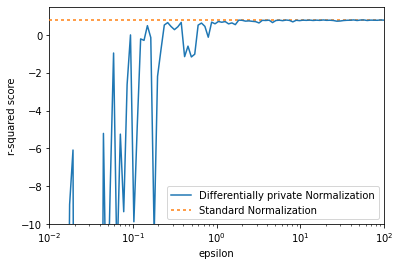

In [317]:
import matplotlib.pyplot as plt

plt.semilogx(epsilons, accuracy, label="Differentially private Normalization", zorder=10)
plt.semilogx(epsilons, baseline * np.ones_like(epsilons), dashes=[2,2], label="Standard Normalization", zorder=5)
plt.xlabel("epsilon")
plt.ylabel("r-squared score")
plt.ylim(-10, 1.5)
plt.xlim(epsilons[0], epsilons[-1])
plt.legend(loc=4)